

# **Aplicación: Red de pases y grafos final de champions 2018/2019**



Este código corresponde al tercer capítulo del Trabajo de Fin de Grado de Daniel Chasco Arpón. En dicho código se desarrolla una aplicación para representar en forma de grafos, la red de pases de cada uno de los equipos que disputaron la Final de Champions en la temporada 2018/2019. La final se disputó entre el Liverpool FC y el Tottenham Hotspur.

## Acceso a los datos

En primer lugar, descargamos las librerías que necesitamos para obtener los datos correspondientes del partido y el dibujo de un campo de fútbol en python. Y además, importamos las librerías de python que vamos a utilizar a lo largo del código.

In [1]:
pip install statsbombpy

     |████████████████████████████████| 44 kB 2.3 MB/s 
     |████████████████████████████████| 141 kB 57.0 MB/s 
     |████████████████████████████████| 213 kB 51.3 MB/s 
     |████████████████████████████████| 127 kB 59.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: coverage
    Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires coverage==3.7.1, but you have coverage 6.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
coveralls 0.5 requires coverage<3.999,>=3.6, but you have coverage 6.2 which is incompatib

In [2]:
pip install mplsoccer

     |████████████████████████████████| 57 kB 4.8 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=9db6728f5f85c7fbf5cef50d8f5a60a3a19237d353e5e748a8e8f103c065361b
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer


In [3]:
from statsbombpy import sb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import networkx as nx
import math
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch

Entonces, mostramos los datos. Como vemos se trata de una base de datos muy extensa, en la que podemos ver estadísticas de partidos muy diversos. Nos quedaremos con el partido que nos interesa.

In [4]:
sb.competitions()

credentials were not supplied. open data access only


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2021-06-22T21:17:46.381,2021-06-13T16:17:31.694,None,2021-06-22T21:17:46.381
9,16,21,Europe,Champions League,male,False,False,2009/2010,2021-06-22T21:24:20.506,2021-06-13T16:17:31.694,None,2021-06-22T21:24:20.506


In [5]:
sb.matches(competition_id=16, season_id=4)

credentials were not supplied. open data access only


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
0,22912,2019-06-01,21:00:00.000,Europe - Champions League,2018/2019,Tottenham Hotspur,Liverpool,0,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,13,Final,Estadio Wanda Metropolitano (Madrid),Damir Skomina,1.1.0,2,2


In [6]:
events=sb.events(match_id=22912)
events.head()

credentials were not supplied. open data access only


,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_punched_out,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,minute,off_camera,out,...,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_outcome,pass_outswinging,pass_recipient,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c4341845-358d-43e7-9af4-9a39aa1d90f1,1,NaN,NaN,22912,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Tottenham Hotspur,38,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Tottenham Hotspur,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6001a7ed-2c00-4cb4-ba33-7ac2b7d07c40,2,NaN,NaN,22912,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Tottenham Hotspur,38,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Liverpool,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52cdf1be-4cbd-4026-b802-e5c3dce19e9c,3,NaN,NaN,22912,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Tottenham Hotspur,38,[97668e09-1ce7-4752-912c-b3a5a1bf6013],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97668e09-1ce7-4752-912c-b3a5a1bf6013,4,NaN,NaN,22912,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Tottenham Hotspur,38,[52cdf1be-4cbd-4026-b802-e5c3dce19e9c],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tottenham Hotspur,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1af6fb91-df41-41be-88d0-d8c35a89d123,1637,NaN,NaN,22912,45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Throw In,NaN,NaN,NaN,81,Tottenham Hotspur,38,[91941118-1209-4a52-9ebb-b5957c0fe97a],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:00:00.000,Half Start,NaN


## Tratamiento de los datos

Y empezamos con el tratamiento y exploración de los datos:

### Visualización de las columnas del dataset

In [7]:
events

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_punched_out,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,minute,off_camera,out,...,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_outcome,pass_outswinging,pass_recipient,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c4341845-358d-43e7-9af4-9a39aa1d90f1,1,NaN,NaN,22912,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Tottenham Hotspur,38,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Tottenham Hotspur,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6001a7ed-2c00-4cb4-ba33-7ac2b7d07c40,2,NaN,NaN,22912,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Tottenham Hotspur,38,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Liverpool,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52cdf1be-4cbd-4026-b802-e5c3dce19e9c,3,NaN,NaN,22912,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Tottenham Hotspur,38,[97668e09-1ce7-4752-912c-b3a5a1bf6013],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97668e09-1ce7-4752-912c-b3a5a1bf6013,4,NaN,NaN,22912,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Tottenham Hotspur,38,[52cdf1be-4cbd-4026-b802-e5c3dce19e9c],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tottenham Hotspur,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1af6fb91-df41-41be-88d0-d8c35a89d123,1637,NaN,NaN,22912,45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Throw In,NaN,NaN,NaN,81,Tottenham Hotspur,38,[91941118-1209-4a52-9ebb-b5957c0fe97a],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1d4966f6-f5f7-4529-a672-3ce5264271f4,2333,NaN,NaN,22912,65,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Fr

In [8]:
#Vemos todas las estadísticas disponibles
events.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_offensive', 'foul_committed_penalty',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_punched_out', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected

### Red de pases del Liverpool

Iremos comentando cada uno de los pasos que llevamos a cabo.

In [9]:
#Nos quedamos con los eventos del Liverpool
events=events[events['team']=='Liverpool']
events.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_punched_out,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,minute,off_camera,out,...,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_outcome,pass_outswinging,pass_recipient,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6001a7ed-2c00-4cb4-ba33-7ac2b7d07c40,2,NaN,NaN,22912,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Tottenham Hotspur,38,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Liverpool,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52cdf1be-4cbd-4026-b802-e5c3dce19e9c,3,NaN,NaN,22912,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Tottenham Hotspur,38,[97668e09-1ce7-4752-912c-b3a5a1bf6013],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1af6fb91-df41-41be-88d0-d8c35a89d123,1637,NaN,NaN,22912,45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Throw In,NaN,NaN,NaN,81,Tottenham Hotspur,38,[91941118-1209-4a52-9ebb-b5957c0fe97a],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:00:00.000,Half Start,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68f1458f-6ddb-4626-82cb-6f96eaca8087,5,NaN,"[61.0, 41.0]",22912,0,NaN,NaN,...,NaN,Ground Pass,NaN,26.360956,NaN,NaN,Joël Andre Job Matip,NaN,NaN,NaN,NaN,NaN,Kick Off,1,From Kick Off,Jordan Brian Henderson,3532.0,Right Center Midfield,2,Liverpool,24,[0c607c5b-7849-4da0-aa96-3a7d4475b700],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:00:00.208,Pass,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.040173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4ce9fdce-4312-46e6-a9a8-f844fc4d8d1e,8,NaN,"[37.0, 44.9]",22912,0,NaN,NaN,...,NaN,High Pass,NaN,64.734070,Incomplete,NaN,Sadio Mané,NaN,NaN,True,NaN,NaN,NaN,1,From Kick Off,Joël Andre Job Matip,3502.0,Right Center Back,2,Liverpool,24,"[2b8b28a3-6309-42c8-8f9f-d085b5ab04fd, 97663e2...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:00:03.358,Pass,NaN


In [10]:
#Y con las columnas que vamos a utilizar
events_1=events[['team', 'type', 'minute', 'location', 'pass_end_location', 'pass_outcome', 'player']]
events_1

,team,type,minute,location,pass_end_location,pass_outcome,player
1,Liverpool,Starting XI,0,NaN,NaN,NaN,NaN
2,Liverpool,Half Start,0,NaN,NaN,NaN,NaN
4,Liverpool,Half Start,45,NaN,NaN,NaN,NaN
6,Liverpool,Pass,0,"[61.0, 41.0]","[34.9, 44.7]",NaN,Jordan Brian Henderson
7,Liverpool,Pass,0,"[37.0, 44.9]","[87.5, 4.4]",Incomplete,Joël Andre Job Matip
...,...,...,...,...,...,...,...
3154,Liverpool,Substitution,57,NaN,NaN,NaN,Roberto Firmino Barbosa de Oliveira
3155,Liverpool,Substitution,61,NaN,NaN,NaN,Georginio Wijnaldum
3159,Liverpool,Substitution,88,NaN,NaN,NaN,Sadio Mané
3161,Liverpool,Tactical Shift,77,NaN,NaN,NaN,NaN


In [11]:
#Obtenemos el minuto donde se hizó la primera substitución, ya que la red
# de pases será entre los 11 jugadores titulares.
subs = events_1[events_1['type']=='Substitution']
subs = subs['minute']
firstSub = subs.min()
firstSub

57

In [12]:
#Vemos los nombres de los jugadores que participaron en el partido (Liverpool)
events_1.player.unique()

array([nan, 'Jordan Brian Henderson', 'Joël Andre Job Matip',
       'Fábio Henrique Tavares', 'Virgil van Dijk', 'Georginio Wijnaldum',
       'Sadio Mané', 'Andrew Robertson', 'Trent Alexander-Arnold',
       'Mohamed Salah', 'Alisson Ramsés Becker',
       'Roberto Firmino Barbosa de Oliveira', 'James Philip Milner',
       'Divock Okoth Origi', 'Joe Gomez'], dtype=object)

In [13]:
#Nos quedamos con los pases, que es lo que nos interesa a la hora de dibujar
events_1 = events_1[events_1['type'].isin(['Pass'])]
events_1

,team,type,minute,location,pass_end_location,pass_outcome,player
6,Liverpool,Pass,0,"[61.0, 41.0]","[34.9, 44.7]",NaN,Jordan Brian Henderson
7,Liverpool,Pass,0,"[37.0, 44.9]","[87.5, 4.4]",Incomplete,Joël Andre Job Matip
9,Liverpool,Pass,0,"[66.5, 15.1]","[83.7, 18.0]",Incomplete,Fábio Henrique Tavares
11,Liverpool,Pass,0,"[76.1, 20.3]","[87.3, 21.2]",Incomplete,Jordan Brian Henderson
13,Liverpool,Pass,0,"[60.4, 20.5]","[66.3, 20.1]",NaN,Virgil van Dijk
...,...,...,...,...,...,...,...
888,Liverpool,Pass,94,"[63.8, 54.7]","[96.4, 72.6]",NaN,Divock Okoth Origi
889,Liverpool,Pass,94,"[97.6, 61.3]","[93.5, 56.7]",NaN,Mohamed Salah
890,Liverpool,Pass,94,"[93.5, 56.7]","[119.8, 55.5]",Out,Divock Okoth Origi
893,Liverpool,Pass,94,"[39.7, 51.9]","[56.4, 59.3]",NaN,Joël Andre Job Matip


In [14]:
#Vemos los etiquetas de la columna de pases 
events_1.pass_outcome.unique()

array([nan, 'Incomplete', 'Unknown', 'Out', 'Pass Offside',
       'Injury Clearance'], dtype=object)

In [15]:
#Vamos a añadir las columnas que nos informen sobre qué jugador da el pase 
#y quién lo recibe.
events_1['Passer']=events_1['player']
events_1['Recipient']=events_1['player'].shift(-1)

#Y nos quedamos con los pases que han sido completados (Los demás no nos interesan)
successful = events_1[events_1['pass_outcome'].isnull()]
successful.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,team,type,minute,location,pass_end_location,pass_outcome,player,Passer,Recipient
6,Liverpool,Pass,0,"[61.0, 41.0]","[34.9, 44.7]",NaN,Jordan Brian Henderson,Jordan Brian Henderson,Joël Andre Job Matip
13,Liverpool,Pass,0,"[60.4, 20.5]","[66.3, 20.1]",NaN,Virgil van Dijk,Virgil van Dijk,Georginio Wijnaldum
14,Liverpool,Pass,0,"[65.6, 19.3]","[65.8, 24.7]",NaN,Georginio Wijnaldum,Georginio Wijnaldum,Jordan Brian Henderson
15,Liverpool,Pass,0,"[65.2, 25.2]","[100.1, 25.4]",NaN,Jordan Brian Henderson,Jordan Brian Henderson,Sadio Mané
28,Liverpool,Pass,3,"[44.6, 1.0]","[54.5, 9.4]",NaN,Andrew Robertson,Andrew Robertson,Sadio Mané


In [16]:
#La primera substitución por parte del Liverpool se hace en el minuto 57. 
#Nos quedaremos entonces con los pases a partir de ese minuto
successful = successful[successful['minute'] < firstSub]
successful

,team,type,minute,location,pass_end_location,pass_outcome,player,Passer,Recipient
6,Liverpool,Pass,0,"[61.0, 41.0]","[34.9, 44.7]",NaN,Jordan Brian Henderson,Jordan Brian Henderson,Joël Andre Job Matip
13,Liverpool,Pass,0,"[60.4, 20.5]","[66.3, 20.1]",NaN,Virgil van Dijk,Virgil van Dijk,Georginio Wijnaldum
14,Liverpool,Pass,0,"[65.6, 19.3]","[65.8, 24.7]",NaN,Georginio Wijnaldum,Georginio Wijnaldum,Jordan Brian Henderson
15,Liverpool,Pass,0,"[65.2, 25.2]","[100.1, 25.4]",NaN,Jordan Brian Henderson,Jordan Brian Henderson,Sadio Mané
28,Liverpool,Pass,3,"[44.6, 1.0]","[54.5, 9.4]",NaN,Andrew Robertson,Andrew Robertson,Sadio Mané
...,...,...,...,...,...,...,...,...,...
556,Liverpool,Pass,53,"[54.4, 34.8]","[102.0, 55.5]",NaN,Georginio Wijnaldum,Georginio Wijnaldum,Georginio Wijnaldum
557,Liverpool,Pass,53,"[91.1, 48.9]","[91.8, 59.1]",NaN,Georginio Wijnaldum,Georginio Wijnaldum,Jordan Brian Henderson
558,Liverpool,Pass,53,"[91.8, 59.1]","[83.9, 48.3]",NaN,Jordan Brian Henderson,Jordan Brian Henderson,Fábio Henrique Tavares
559,Liverpool,Pass,53,"[83.9, 48.3]","[83.2, 20.8]",NaN,Fábio Henrique Tavares,Fábio Henrique Tavares,Andrew Robertson


In [17]:
#Las localizaciones de donde se da y se recibe el pase las tenemos.
#Pero necesitamos desglosarlas. Para ello creamos nuevas columnas en nuestro dataset.
pass_loc = successful['location']
pass_loc= pd.DataFrame(pass_loc.to_list(), columns=['x', 'y'])
pass_end_loc = successful['pass_end_location']
pass_end_loc = pd.DataFrame(pass_end_loc.to_list(), columns=['end_x', 'end_y'])

In [18]:
#Y las añadimos:
successful=successful.reset_index()
successful['x'] = pass_loc['x']
successful['y'] = pass_loc['y']
successful['end_x'] = pass_end_loc['end_x']
successful['end_y'] = pass_end_loc['end_y']
successful

,index,team,type,minute,location,pass_end_location,pass_outcome,player,Passer,Recipient,x,y,end_x,end_y
0,6,Liverpool,Pass,0,"[61.0, 41.0]","[34.9, 44.7]",NaN,Jordan Brian Henderson,Jordan Brian Henderson,Joël Andre Job Matip,61.0,41.0,34.9,44.7
1,13,Liverpool,Pass,0,"[60.4, 20.5]","[66.3, 20.1]",NaN,Virgil van Dijk,Virgil van Dijk,Georginio Wijnaldum,60.4,20.5,66.3,20.1
2,14,Liverpool,Pass,0,"[65.6, 19.3]","[65.8, 24.7]",NaN,Georginio Wijnaldum,Georginio Wijnaldum,Jordan Brian Henderson,65.6,19.3,65.8,24.7
3,15,Liverpool,Pass,0,"[65.2, 25.2]","[100.1, 25.4]",NaN,Jordan Brian Henderson,Jordan Brian Henderson,Sadio Mané,65.2,25.2,100.1,25.4
4,28,Liverpool,Pass,3,"[44.6, 1.0]","[54.5, 9.4]",NaN,Andrew Robertson,Andrew Robertson,Sadio Mané,44.6,1.0,54.5,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,556,Liverpool,Pass,53,"[54.4, 34.8]","[102.0, 55.5]",NaN,Georginio Wijnaldum,Georginio Wijnaldum,Georginio Wijnaldum,54.4,34.8,102.0,55.5
139,557,Liverpool,Pass,53,"[91.1, 48.9]","[91.8, 59.1]",NaN,Georginio Wijnaldum,Georginio Wijnaldum,Jordan Brian Henderson,91.1,48.9,91.8,59.1
140,558,Liverpool,Pass,53,"[91.8, 59.1]","[83.9, 48.3]",NaN,Jordan Brian Henderson,Jordan Brian Henderson,Fábio Henrique Tavares,91.8,59.1,83.9,48.3
141,559,Liverpool,Pass,53,"[83.9, 48.3]","[83.2, 20.8]",NaN,Fábio Henrique Tavares,Fábio Henrique Tavares,Andrew Robertson,83.9,48.3,83.2,20.8


In [19]:
#Eliminamos las columnas location y pass_end_location de nuestro dataset
#Ya que las hemos desglosado en las nuevas
del successful['location']
del successful['pass_end_location']
successful

,index,team,type,minute,pass_outcome,player,Passer,Recipient,x,y,end_x,end_y
0,6,Liverpool,Pass,0,NaN,Jordan Brian Henderson,Jordan Brian Henderson,Joël Andre Job Matip,61.0,41.0,34.9,44.7
1,13,Liverpool,Pass,0,NaN,Virgil van Dijk,Virgil van Dijk,Georginio Wijnaldum,60.4,20.5,66.3,20.1
2,14,Liverpool,Pass,0,NaN,Georginio Wijnaldum,Georginio Wijnaldum,Jordan Brian Henderson,65.6,19.3,65.8,24.7
3,15,Liverpool,Pass,0,NaN,Jordan Brian Henderson,Jordan Brian Henderson,Sadio Mané,65.2,25.2,100.1,25.4
4,28,Liverpool,Pass,3,NaN,Andrew Robertson,Andrew Robertson,Sadio Mané,44.6,1.0,54.5,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
138,556,Liverpool,Pass,53,NaN,Georginio Wijnaldum,Georginio Wijnaldum,Georginio Wijnaldum,54.4,34.8,102.0,55.5
139,557,Liverpool,Pass,53,NaN,Georginio Wijnaldum,Georginio Wijnaldum,Jordan Brian Henderson,91.1,48.9,91.8,59.1
140,558,Liverpool,Pass,53,NaN,Jordan Brian Henderson,Jordan Brian Henderson,Fábio Henrique Tavares,91.8,59.1,83.9,48.3
141,559,Liverpool,Pass,53,NaN,Fábio Henrique Tavares,Fábio Henrique Tavares,Andrew Robertson,83.9,48.3,83.2,20.8


In [20]:
#Obtenemos la media de las posiciones de pase de cada jugador
#Esto lo utilizamos para conseguir posicionar los jugadores en el campo
average_locations = successful.groupby('Passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']
average_locations

,x,y,count
Passer,,,
Alisson Ramsés Becker,12.313333,41.546667,15
Andrew Robertson,52.478261,9.213043,23
Fábio Henrique Tavares,56.933333,44.044444,9
Georginio Wijnaldum,74.150000,31.325000,12
Jordan Brian Henderson,75.414286,49.950000,14
Joël Andre Job Matip,34.171429,50.885714,14
Mohamed Salah,94.500000,52.720000,5
Roberto Firmino Barbosa de Oliveira,94.775000,37.387500,8
Sadio Mané,71.733333,20.500000,12


In [21]:
#Aspciamos a cada jugador su dorsal.
#Esto nos servirá a la hora de dibujar nuestra red.
average_locations['Dorsal']=[13,26,3,5,14,32,11,9,10,66,4]
average_locations

,x,y,count,Dorsal
Passer,,,,
Alisson Ramsés Becker,12.313333,41.546667,15,13
Andrew Robertson,52.478261,9.213043,23,26
Fábio Henrique Tavares,56.933333,44.044444,9,3
Georginio Wijnaldum,74.150000,31.325000,12,5
Jordan Brian Henderson,75.414286,49.950000,14,14
Joël Andre Job Matip,34.171429,50.885714,14,32
Mohamed Salah,94.500000,52.720000,5,11
Roberto Firmino Barbosa de Oliveira,94.775000,37.387500,8,9
Sadio Mané,71.733333,20.500000,12,10


In [22]:
# Calculamos el número de pases entre cada jugador
pass_bet = successful.groupby(['Passer', 'Recipient']).index.count().reset_index()
pass_bet.rename({'index':'pass_count'}, axis='columns', inplace=True)
pass_bet

,Passer,Recipient,pass_count
0,Alisson Ramsés Becker,Andrew Robertson,2
1,Alisson Ramsés Becker,Fábio Henrique Tavares,2
2,Alisson Ramsés Becker,Joël Andre Job Matip,3
3,Alisson Ramsés Becker,Sadio Mané,1
4,Alisson Ramsés Becker,Trent Alexander-Arnold,1
...,...,...,...
69,Virgil van Dijk,Georginio Wijnaldum,1
70,Virgil van Dijk,Jordan Brian Henderson,2
71,Virgil van Dijk,Joël Andre Job Matip,4
72,Virgil van Dijk,Mohamed Salah,1


In [23]:
#Y obtenemos una nueva tabla, asociando cada uno de los nombres con su dorsal correspondiente.
pass_bet['Passer']=pass_bet['Passer'].replace('Alisson Ramsés Becker', 13)
pass_bet['Passer']=pass_bet['Passer'].replace('Andrew Robertson', 26)
pass_bet['Passer']=pass_bet['Passer'].replace('Fábio Henrique Tavares', 3)
pass_bet['Passer']=pass_bet['Passer'].replace('Georginio Wijnaldum', 5)
pass_bet['Passer']=pass_bet['Passer'].replace('Jordan Brian Henderson', 14)
pass_bet['Passer']=pass_bet['Passer'].replace('Joël Andre Job Matip', 32)
pass_bet['Passer']=pass_bet['Passer'].replace('Mohamed Salah', 11)
pass_bet['Passer']=pass_bet['Passer'].replace('Roberto Firmino Barbosa de Oliveira', 9)
pass_bet['Passer']=pass_bet['Passer'].replace('Sadio Mané', 10)
pass_bet['Passer']=pass_bet['Passer'].replace('Trent Alexander-Arnold', 66)
pass_bet['Passer']=pass_bet['Passer'].replace('Virgil van Dijk', 4)

pass_bet['Recipient']=pass_bet['Recipient'].replace('Alisson Ramsés Becker', 13)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Andrew Robertson', 26)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Fábio Henrique Tavares', 3)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Georginio Wijnaldum', 5)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Jordan Brian Henderson', 14)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Joël Andre Job Matip', 32)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Mohamed Salah', 11)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Roberto Firmino Barbosa de Oliveira', 9)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Sadio Mané', 10)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Trent Alexander-Arnold', 66)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Virgil van Dijk', 4)

pass_bet

,Passer,Recipient,pass_count
0,13,26,2
1,13,3,2
2,13,32,3
3,13,10,1
4,13,66,1
...,...,...,...
69,4,5,1
70,4,14,2
71,4,32,4
72,4,11,1


In [24]:
#Eliminamos los pases que son dados y recibidos por el mismo jugador.
#Son fallos en los datos que tenemos que tener en cuenta.
indexNames=pass_bet.loc[pass_bet['Passer']==pass_bet['Recipient']].index
pass_bet.drop(indexNames , inplace=True)

In [25]:
#Mostramos nuestro nuevo pass_bet.
#Esta tabla la utilizaremos para dibujar nuestro futuro grafo.
pass_bet.head(10)

,Passer,Recipient,pass_count
0,13,26,2
1,13,3,2
2,13,32,3
3,13,10,1
4,13,66,1
5,13,4,6
6,26,13,3
8,26,3,2
9,26,5,2
10,26,14,1


In [ ]:
#Ahora necesitamos encontrar el número de pases entre cada jugador
pass_between = successful.groupby(['Passer','Recipient']).index.count().reset_index()
pass_between.rename({'index':'pass_count'},axis='columns',inplace=True)

#Añadimos la localización de cada jugador al dataset inicial.
pass_between = pass_between.merge(average_locations, left_on='Passer',right_index=True)
pass_between = pass_between.merge(average_locations, left_on='Recipient',right_index=True,suffixes=['', '_end'])

In [ ]:
#Este dataset nos proporciona toda la información agrupada
pass_between

,Passer,Recipient,pass_count,x,y,count,Dorsal,x_end,y_end,count_end,Dorsal_end
0,Alisson Ramsés Becker,Andrew Robertson,2,12.313333,41.546667,15,13,52.478261,9.213043,23,26
7,Andrew Robertson,Andrew Robertson,2,52.478261,9.213043,23,26,52.478261,9.213043,23,26
17,Fábio Henrique Tavares,Andrew Robertson,2,56.933333,44.044444,9,3,52.478261,9.213043,23,26
22,Georginio Wijnaldum,Andrew Robertson,2,74.150000,31.325000,12,5,52.478261,9.213043,23,26
30,Jordan Brian Henderson,Andrew Robertson,1,75.414286,49.950000,14,14,52.478261,9.213043,23,26
...,...,...,...,...,...,...,...,...,...,...,...
33,Jordan Brian Henderson,Mohamed Salah,2,75.414286,49.950000,14,14,94.500000,52.720000,5,11
50,Roberto Firmino Barbosa de Oliveira,Mohamed Salah,1,94.775000,37.387500,8,9,94.500000,52.720000,5,11
58,Sadio Mané,Mohamed Salah,1,71.733333,20.500000,12,10,94.500000,52.720000,5,11
63,Trent Alexander-Arnold,Mohamed Salah,2,69.323077,68.115385,13,66,94.500000,52.720000,5,11


In [ ]:
#Y de nuevo sustituimos cada jugador por su dorsal
pass_between['Passer']=pass_between['Passer'].replace('Alisson Ramsés Becker', 13)
pass_between['Passer']=pass_between['Passer'].replace('Andrew Robertson', 26)
pass_between['Passer']=pass_between['Passer'].replace('Fábio Henrique Tavares', 3)
pass_between['Passer']=pass_between['Passer'].replace('Georginio Wijnaldum', 5)
pass_between['Passer']=pass_between['Passer'].replace('Jordan Brian Henderson', 14)
pass_between['Passer']=pass_between['Passer'].replace('Joël Andre Job Matip', 32)
pass_between['Passer']=pass_between['Passer'].replace('Mohamed Salah', 11)
pass_between['Passer']=pass_between['Passer'].replace('Roberto Firmino Barbosa de Oliveira', 9)
pass_between['Passer']=pass_between['Passer'].replace('Sadio Mané', 10)
pass_between['Passer']=pass_between['Passer'].replace('Trent Alexander-Arnold', 66)
pass_between['Passer']=pass_between['Passer'].replace('Virgil van Dijk', 4)

pass_between['Recipient']=pass_between['Recipient'].replace('Alisson Ramsés Becker', 13)
pass_between['Recipient']=pass_between['Recipient'].replace('Andrew Robertson', 26)
pass_between['Recipient']=pass_between['Recipient'].replace('Fábio Henrique Tavares', 3)
pass_between['Recipient']=pass_between['Recipient'].replace('Georginio Wijnaldum', 5)
pass_between['Recipient']=pass_between['Recipient'].replace('Jordan Brian Henderson', 14)
pass_between['Recipient']=pass_between['Recipient'].replace('Joël Andre Job Matip', 32)
pass_between['Recipient']=pass_between['Recipient'].replace('Mohamed Salah', 11)
pass_between['Recipient']=pass_between['Recipient'].replace('Roberto Firmino Barbosa de Oliveira', 9)
pass_between['Recipient']=pass_between['Recipient'].replace('Sadio Mané', 10)
pass_between['Recipient']=pass_between['Recipient'].replace('Trent Alexander-Arnold', 66)
pass_between['Recipient']=pass_between['Recipient'].replace('Virgil van Dijk', 4)

pass_between

,Passer,Recipient,pass_count,x,y,count,Dorsal,x_end,y_end,count_end,Dorsal_end
0,13,26,2,12.313333,41.546667,15,13,52.478261,9.213043,23,26
7,26,26,2,52.478261,9.213043,23,26,52.478261,9.213043,23,26
17,3,26,2,56.933333,44.044444,9,3,52.478261,9.213043,23,26
22,5,26,2,74.150000,31.325000,12,5,52.478261,9.213043,23,26
30,14,26,1,75.414286,49.950000,14,14,52.478261,9.213043,23,26
...,...,...,...,...,...,...,...,...,...,...,...
33,14,11,2,75.414286,49.950000,14,14,94.500000,52.720000,5,11
50,9,11,1,94.775000,37.387500,8,9,94.500000,52.720000,5,11
58,10,11,1,71.733333,20.500000,12,10,94.500000,52.720000,5,11
63,66,11,2,69.323077,68.115385,13,66,94.500000,52.720000,5,11


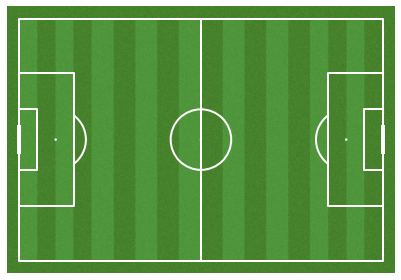

In [ ]:
#Dibujar un campo se hace de manera muy sencilla:
pitch = Pitch(pitch_color='grass', line_color='white',
              stripe=True)  # optional stripes
fig, ax = pitch.draw()

Text(0.5, 1.0, 'Liverpool FC')

findfont: Font family ['Century Gothic'] not found. Falling back to DejaVu Sans.


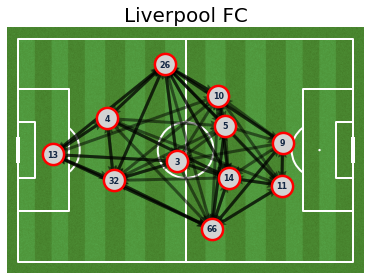

In [ ]:
#Y la red de pases junto al campo de la siguiente forma:

pitch = Pitch(pitch_color='grass', line_color='white',
              stripe=True)  # optional stripes
fig, ax = pitch.draw()
#Dibujamos las flechas
arrows = pitch.arrows(pass_between.x,pass_between.y,pass_between.x_end,pass_between.y_end,
                     width = 3, headwidth = 3, color = 'black', ax = ax, zorder = 1, alpha = .5)
#Dibujamos los vértices (Cada uno de los jugadores)
nodes = pitch.scatter(average_locations.x,average_locations.y,
                     s = 450, color = '#d3d3d3', edgecolors = 'red', linewidth = 2.5, alpha = 1, zorder = 1, ax=ax)

#Dibujamos los números dentro de cada vértice:
for index, row in average_locations.iterrows():
     pitch.annotate(int(row.Dorsal), xy=(row.x,row.y), c='#132743', va='center', ha='center', size=8, fontweight='bold', fontfamily="Century Gothic",ax=ax)

#Ponemos el título:
ax.set_title('Liverpool FC', size=20)

### Grafo del Liverpool

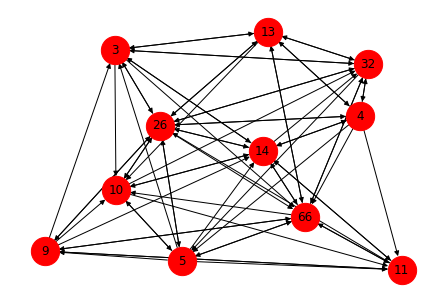

In [ ]:
#Utilizamos el dataset modificado pass_bet (Preparado para hacer la red de pases)
L = pass_bet.apply(tuple, axis=1).tolist()
G = nx.DiGraph()
G.add_weighted_edges_from(L)
nx.draw(G, node_size=800, with_labels=True, node_color='red')

In [ ]:
nx.write_gexf( G , "GrafoLiverpool.gexf" )

In [ ]:
#Grados de los vértices
dict(nx.degree(G))

{3: 12,
 4: 11,
 5: 12,
 9: 10,
 10: 12,
 11: 10,
 13: 11,
 14: 15,
 26: 18,
 32: 13,
 66: 16}

In [ ]:
print(dict(G.in_degree()))
print(dict(G.out_degree()))

{13: 5, 26: 9, 3: 6, 32: 7, 10: 7, 66: 9, 4: 4, 5: 5, 14: 8, 9: 4, 11: 6}
{13: 6, 26: 9, 3: 6, 32: 6, 10: 5, 66: 7, 4: 7, 5: 7, 14: 7, 9: 6, 11: 4}


In [ ]:
#La cercanía mide de alguna forma la accesibilidad de un nodo en la red
DORSALES={3,4,5,9,10,11,13,14,26,32,66}
for x in DORSALES:
  print(x,':',nx.closeness_centrality(G,x))

32 : 0.7692307692307693
66 : 0.9090909090909091
3 : 0.7142857142857143
4 : 0.625
5 : 0.6666666666666666
9 : 0.625
10 : 0.7692307692307693
11 : 0.7142857142857143
13 : 0.6666666666666666
14 : 0.8333333333333334
26 : 0.9090909090909091


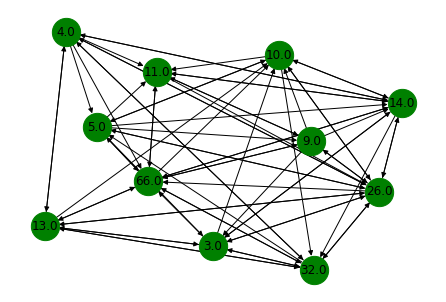

In [ ]:
def inv(x): 
    return 1/x

GR = pass_bet[:]
GR['pass_count'] = GR['pass_count'].apply(inv)

LR = GR.apply(tuple, axis=1).tolist()

G_inw = nx.DiGraph()
G_inw.add_weighted_edges_from(LR)
nx.draw(G_inw, node_size=800, with_labels=True, node_color='green')

In [ ]:
dis = nx.shortest_path(G_inw, weight='pass_count')
dis

{3.0: {3.0: [3.0],
  4.0: [3.0, 13.0, 4.0],
  5.0: [3.0, 26.0, 5.0],
  9.0: [3.0, 26.0, 9.0],
  10.0: [3.0, 10.0],
  11.0: [3.0, 14.0, 11.0],
  13.0: [3.0, 13.0],
  14.0: [3.0, 14.0],
  26.0: [3.0, 26.0],
  32.0: [3.0, 32.0],
  66.0: [3.0, 66.0]},
 4.0: {3.0: [4.0, 13.0, 3.0],
  4.0: [4.0],
  5.0: [4.0, 5.0],
  9.0: [4.0, 26.0, 9.0],
  10.0: [4.0, 13.0, 10.0],
  11.0: [4.0, 11.0],
  13.0: [4.0, 13.0],
  14.0: [4.0, 14.0],
  26.0: [4.0, 26.0],
  32.0: [4.0, 32.0],
  66.0: [4.0, 66.0]},
 5.0: {3.0: [5.0, 3.0],
  4.0: [5.0, 26.0, 4.0],
  5.0: [5.0],
  9.0: [5.0, 9.0],
  10.0: [5.0, 10.0],
  11.0: [5.0, 11.0],
  13.0: [5.0, 26.0, 13.0],
  14.0: [5.0, 14.0],
  26.0: [5.0, 26.0],
  32.0: [5.0, 26.0, 32.0],
  66.0: [5.0, 66.0]},
 9.0: {3.0: [9.0, 3.0],
  4.0: [9.0, 26.0, 4.0],
  5.0: [9.0, 26.0, 5.0],
  9.0: [9.0],
  10.0: [9.0, 10.0],
  11.0: [9.0, 11.0],
  13.0: [9.0, 26.0, 13.0],
  14.0: [9.0, 14.0],
  26.0: [9.0, 26.0],
  32.0: [9.0, 26.0, 32.0],
  66.0: [9.0, 66.0]},
 10.0: {3.0: [10.0, 

In [ ]:
#Camino más corto para ir de Alisson(Portero) a Salah(Delantero)
dis[13][11]

[13.0, 10.0, 11.0]

In [ ]:
#Centralidad de intermediación (betweenness centrality)
BC = nx.betweenness_centrality(G, weight='pass_count')
BC

{3: 0.02074074074074074,
 4: 0.020370370370370372,
 5: 0.03343915343915344,
 9: 0.012142857142857143,
 10: 0.028439153439153438,
 11: 0.013994708994708996,
 13: 0.016957671957671956,
 14: 0.060291005291005284,
 26: 0.11611111111111111,
 32: 0.03621693121693122,
 66: 0.08574074074074074}

In [ ]:
max_bc = max(BC, key=BC.get)
max_bc

26

### Red de pases del Tottenham

In [ ]:
events=events[events['team']=='Tottenham Hotspur']
events.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_punched_out,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,minute,off_camera,out,...,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_outcome,pass_outswinging,pass_recipient,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c4341845-358d-43e7-9af4-9a39aa1d90f1,1,NaN,NaN,22912,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Tottenham Hotspur,38,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Tottenham Hotspur,00:00:00.000,Starting XI,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97668e09-1ce7-4752-912c-b3a5a1bf6013,4,NaN,NaN,22912,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Tottenham Hotspur,38,[52cdf1be-4cbd-4026-b802-e5c3dce19e9c],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tottenham Hotspur,00:00:00.000,Half Start,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91941118-1209-4a52-9ebb-b5957c0fe97a,1638,NaN,NaN,22912,45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Throw In,NaN,NaN,NaN,81,Tottenham Hotspur,38,[1af6fb91-df41-41be-88d0-d8c35a89d123],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tottenham Hotspur,00:00:00.000,Half Start,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.305768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97663e2f-a285-4714-b5f4-3e973e39c8c4,10,NaN,"[33.5, 76.6]",22912,0,NaN,NaN,...,NaN,High Pass,NaN,23.568836,Incomplete,NaN,Harry Kane,NaN,NaN,NaN,NaN,NaN,Recovery,1,From Kick Off,Kieran Trippier,3308.0,Right Back,2,Liverpool,24,"[4ce9fdce-4312-46e6-a9a8-f844fc4d8d1e, 9f6bb7e...",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tottenham Hotspur,00:00:05.398,Pass,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.564903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ab4cdc27-8ab4-40b3-8faa-2d6acc49c30c,14,NaN,"[37.3, 63.0]",22912,0,NaN,NaN,...,NaN,High Pass,NaN,7.940403,Incomplete,NaN,Harry Winks,NaN,NaN,NaN,NaN,NaN,Recovery,1,From Kick Off,Moussa Sissoko,3091.0,Right Defensive Midfield,2,Liverpool,24,"[12da1497-c107-4955-942c-cb10bac3ea41, 8324b24...",8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tottenham Hotspur,00:00:08.854,Pass,NaN


In [ ]:
events_1=events[['team', 'type', 'minute', 'location', 'pass_end_location', 'pass_outcome', 'player']]
events_1

,team,type,minute,location,pass_end_location,pass_outcome,player
0,Tottenham Hotspur,Starting XI,0,NaN,NaN,NaN,NaN
3,Tottenham Hotspur,Half Start,0,NaN,NaN,NaN,NaN
5,Tottenham Hotspur,Half Start,45,NaN,NaN,NaN,NaN
8,Tottenham Hotspur,Pass,0,"[33.5, 76.6]","[54.5, 65.9]",Incomplete,Kieran Trippier
10,Tottenham Hotspur,Pass,0,"[37.3, 63.0]","[44.9, 60.7]",Incomplete,Moussa Sissoko
...,...,...,...,...,...,...,...
3157,Tottenham Hotspur,Substitution,73,NaN,NaN,NaN,Moussa Sissoko
3158,Tottenham Hotspur,Substitution,81,NaN,NaN,NaN,Bamidele Alli
3160,Tottenham Hotspur,Tactical Shift,65,NaN,NaN,NaN,NaN
3162,Tottenham Hotspur,Tactical Shift,82,NaN,NaN,NaN,NaN


In [ ]:
#Obtenemos el minuto donde se hizó la primera substitución, ya que la red
# de pases será entre los 11 jugadores titulares.
subs = events_1[events_1['type']=='Substitution']
subs = subs['minute']
firstSub = subs.min()
firstSub

65

In [ ]:
#Vemos los nombres de los jugadores que participaron en el partido (Tottenham Hotspur)
events_1.player.unique()

array([nan, 'Kieran Trippier', 'Moussa Sissoko', 'Toby Alderweireld',
       'Harry Kane', 'Bamidele Alli', 'Christian Dannemann Eriksen',
       'Jan Vertonghen', 'Harry Winks', 'Danny Rose', 'Heung-Min Son',
       'Hugo Lloris', 'Lucas Rodrigues Moura da Silva', 'Eric Dier',
       'Fernando Llorente Torres'], dtype=object)

In [ ]:
#Nos quedamos con los pases, que es lo que nos interesa a la hora de dibujar
events_1 = events_1[events_1['type'].isin(['Pass'])]
events_1

,team,type,minute,location,pass_end_location,pass_outcome,player
8,Tottenham Hotspur,Pass,0,"[33.5, 76.6]","[54.5, 65.9]",Incomplete,Kieran Trippier
10,Tottenham Hotspur,Pass,0,"[37.3, 63.0]","[44.9, 60.7]",Incomplete,Moussa Sissoko
12,Tottenham Hotspur,Pass,0,"[33.7, 59.8]","[60.6, 60.5]",Incomplete,Toby Alderweireld
17,Tottenham Hotspur,Pass,2,"[60.0, 40.0]","[43.4, 40.3]",NaN,Harry Kane
18,Tottenham Hotspur,Pass,2,"[42.8, 40.3]","[106.2, 58.8]",Incomplete,Bamidele Alli
...,...,...,...,...,...,...,...
885,Tottenham Hotspur,Pass,94,"[91.1, 8.4]","[105.4, 37.6]",Incomplete,Eric Dier
886,Tottenham Hotspur,Pass,94,"[65.8, 24.3]","[90.4, 35.2]",Incomplete,Jan Vertonghen
891,Tottenham Hotspur,Pass,94,"[7.0, 37.0]","[23.1, 55.0]",NaN,Hugo Lloris
892,Tottenham Hotspur,Pass,94,"[23.1, 55.0]","[81.3, 29.1]",Incomplete,Toby Alderweireld


In [ ]:
#Vamos a añadir las columnas que nos informen sobre qué jugador da el pase 
#y quién lo recibe.
events_1['Passer']=events_1['player']
events_1['Recipient']=events_1['player'].shift(-1)

#Y nos quedamos con los pases que han sido completados (Los demás no nos interesan)
successful = events_1[events_1['pass_outcome'].isnull()]
successful.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,team,type,minute,location,pass_end_location,pass_outcome,player,Passer,Recipient
17,Tottenham Hotspur,Pass,2,"[60.0, 40.0]","[43.4, 40.3]",NaN,Harry Kane,Harry Kane,Bamidele Alli
25,Tottenham Hotspur,Pass,3,"[49.7, 62.3]","[54.0, 49.4]",NaN,Kieran Trippier,Kieran Trippier,Harry Winks
26,Tottenham Hotspur,Pass,3,"[53.6, 50.1]","[60.0, 53.4]",NaN,Harry Winks,Harry Winks,Bamidele Alli
34,Tottenham Hotspur,Pass,3,"[42.0, 15.4]","[60.5, 16.5]",NaN,Danny Rose,Danny Rose,Heung-Min Son
39,Tottenham Hotspur,Pass,3,"[37.0, 51.5]","[29.2, 44.2]",NaN,Kieran Trippier,Kieran Trippier,Toby Alderweireld


In [ ]:
#La primera substitución por parte del Tottenham se hace en el minuto 65. 
#Nos quedaremos entonces con los pases a partir de ese minuto
successful = successful[successful['minute'] < firstSub]
successful

,team,type,minute,location,pass_end_location,pass_outcome,player,Passer,Recipient
17,Tottenham Hotspur,Pass,2,"[60.0, 40.0]","[43.4, 40.3]",NaN,Harry Kane,Harry Kane,Bamidele Alli
25,Tottenham Hotspur,Pass,3,"[49.7, 62.3]","[54.0, 49.4]",NaN,Kieran Trippier,Kieran Trippier,Harry Winks
26,Tottenham Hotspur,Pass,3,"[53.6, 50.1]","[60.0, 53.4]",NaN,Harry Winks,Harry Winks,Bamidele Alli
34,Tottenham Hotspur,Pass,3,"[42.0, 15.4]","[60.5, 16.5]",NaN,Danny Rose,Danny Rose,Heung-Min Son
39,Tottenham Hotspur,Pass,3,"[37.0, 51.5]","[29.2, 44.2]",NaN,Kieran Trippier,Kieran Trippier,Toby Alderweireld
...,...,...,...,...,...,...,...,...,...
661,Tottenham Hotspur,Pass,63,"[56.9, 47.2]","[49.4, 50.9]",NaN,Moussa Sissoko,Moussa Sissoko,Toby Alderweireld
662,Tottenham Hotspur,Pass,63,"[49.4, 50.9]","[55.9, 37.3]",NaN,Toby Alderweireld,Toby Alderweireld,Harry Winks
663,Tottenham Hotspur,Pass,64,"[57.4, 50.3]","[36.9, 53.7]",NaN,Harry Winks,Harry Winks,Toby Alderweireld
664,Tottenham Hotspur,Pass,64,"[34.7, 53.7]","[10.6, 44.4]",NaN,Toby Alderweireld,Toby Alderweireld,Hugo Lloris


In [ ]:
#Las localizaciones de donde se da y se recibe el pase las tenemos.
#Pero necesitamos desglosarlas. Para ello creamos nuevas columnas en nuestro dataset.
pass_loc = successful['location']
pass_loc= pd.DataFrame(pass_loc.to_list(), columns=['x', 'y'])
pass_end_loc = successful['pass_end_location']
pass_end_loc = pd.DataFrame(pass_end_loc.to_list(), columns=['end_x', 'end_y'])

#Y las añadimos:
successful=successful.reset_index()
successful['x'] = pass_loc['x']
successful['y'] = pass_loc['y']
successful['end_x'] = pass_end_loc['end_x']
successful['end_y'] = pass_end_loc['end_y']

#Eliminamos las columnas location y pass_end_location de nuestro dataset
#Ya que las hemos desglosado en las nuevas
del successful['location']
del successful['pass_end_location']
successful

,index,team,type,minute,pass_outcome,player,Passer,Recipient,x,y,end_x,end_y
0,17,Tottenham Hotspur,Pass,2,NaN,Harry Kane,Harry Kane,Bamidele Alli,60.0,40.0,43.4,40.3
1,25,Tottenham Hotspur,Pass,3,NaN,Kieran Trippier,Kieran Trippier,Harry Winks,49.7,62.3,54.0,49.4
2,26,Tottenham Hotspur,Pass,3,NaN,Harry Winks,Harry Winks,Bamidele Alli,53.6,50.1,60.0,53.4
3,34,Tottenham Hotspur,Pass,3,NaN,Danny Rose,Danny Rose,Heung-Min Son,42.0,15.4,60.5,16.5
4,39,Tottenham Hotspur,Pass,3,NaN,Kieran Trippier,Kieran Trippier,Toby Alderweireld,37.0,51.5,29.2,44.2
...,...,...,...,...,...,...,...,...,...,...,...,...
324,661,Tottenham Hotspur,Pass,63,NaN,Moussa Sissoko,Moussa Sissoko,Toby Alderweireld,56.9,47.2,49.4,50.9
325,662,Tottenham Hotspur,Pass,63,NaN,Toby Alderweireld,Toby Alderweireld,Harry Winks,49.4,50.9,55.9,37.3
326,663,Tottenham Hotspur,Pass,64,NaN,Harry Winks,Harry Winks,Toby Alderweireld,57.4,50.3,36.9,53.7
327,664,Tottenham Hotspur,Pass,64,NaN,Toby Alderweireld,Toby Alderweireld,Hugo Lloris,34.7,53.7,10.6,44.4


In [ ]:
#Obtenemos la media de las posiciones de pase de cada jugador
#Esto lo utilizamos para conseguir posicionar los jugadores en el campo
average_locations = successful.groupby('Passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']
average_locations

,x,y,count
Passer,,,
Bamidele Alli,80.361905,32.300000,21
Christian Dannemann Eriksen,72.095652,47.273913,23
Danny Rose,52.057576,5.796970,33
Harry Kane,69.400000,54.075000,4
Harry Winks,55.530769,38.192308,39
Heung-Min Son,72.390909,26.763636,11
Hugo Lloris,9.600000,38.629032,31
Jan Vertonghen,32.847059,20.054902,51
Kieran Trippier,57.357895,73.305263,38


In [ ]:
#Aspciamos a cada jugador su dorsal.
#Esto nos servirá a la hora de dibujar nuestra red.
average_locations['Dorsal']=[20,23,3,10,8,7,1,5,2,17,4]
average_locations

,x,y,count,Dorsal
Passer,,,,
Bamidele Alli,80.361905,32.300000,21,20
Christian Dannemann Eriksen,72.095652,47.273913,23,23
Danny Rose,52.057576,5.796970,33,3
Harry Kane,69.400000,54.075000,4,10
Harry Winks,55.530769,38.192308,39,8
Heung-Min Son,72.390909,26.763636,11,7
Hugo Lloris,9.600000,38.629032,31,1
Jan Vertonghen,32.847059,20.054902,51,5
Kieran Trippier,57.357895,73.305263,38,2


In [ ]:
# Calculamos el número de pases entre cada jugador
pass_bet = successful.groupby(['Passer', 'Recipient']).index.count().reset_index()
pass_bet.rename({'index':'pass_count'}, axis='columns', inplace=True)
pass_bet

,Passer,Recipient,pass_count
0,Bamidele Alli,Christian Dannemann Eriksen,6
1,Bamidele Alli,Danny Rose,4
2,Bamidele Alli,Harry Winks,4
3,Bamidele Alli,Heung-Min Son,1
4,Bamidele Alli,Kieran Trippier,3
...,...,...,...
77,Toby Alderweireld,Harry Winks,4
78,Toby Alderweireld,Hugo Lloris,11
79,Toby Alderweireld,Jan Vertonghen,19
80,Toby Alderweireld,Kieran Trippier,10


In [ ]:
#Y obtenemos una nueva tabla, asociando cada uno de los nombres con su dorsal correspondiente.
pass_bet['Passer']=pass_bet['Passer'].replace('Bamidele Alli', 20)
pass_bet['Passer']=pass_bet['Passer'].replace('Christian Dannemann Eriksen', 23)
pass_bet['Passer']=pass_bet['Passer'].replace('Danny Rose', 3)
pass_bet['Passer']=pass_bet['Passer'].replace('Harry Kane', 10)
pass_bet['Passer']=pass_bet['Passer'].replace('Harry Winks', 8)
pass_bet['Passer']=pass_bet['Passer'].replace('Heung-Min Son', 7)
pass_bet['Passer']=pass_bet['Passer'].replace('Hugo Lloris', 1)
pass_bet['Passer']=pass_bet['Passer'].replace('Jan Vertonghen', 5)
pass_bet['Passer']=pass_bet['Passer'].replace('Kieran Trippier', 2)
pass_bet['Passer']=pass_bet['Passer'].replace('Moussa Sissoko', 17)
pass_bet['Passer']=pass_bet['Passer'].replace('Toby Alderweireld', 4)

pass_bet['Recipient']=pass_bet['Recipient'].replace('Bamidele Alli', 20)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Christian Dannemann Eriksen', 23)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Danny Rose', 3)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Harry Kane', 10)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Harry Winks', 8)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Heung-Min Son', 7)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Hugo Lloris', 1)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Jan Vertonghen', 5)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Kieran Trippier', 2)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Moussa Sissoko', 17)
pass_bet['Recipient']=pass_bet['Recipient'].replace('Toby Alderweireld', 4)

pass_bet

,Passer,Recipient,pass_count
0,20,23,6
1,20,3,4
2,20,8,4
3,20,7,1
4,20,2,3
...,...,...,...
77,4,8,4
78,4,1,11
79,4,5,19
80,4,2,10


In [ ]:
#Eliminamos los pases que son dados y recibidos por el mismo jugador.
#Son fallos en los datos que tenemos que tener en cuenta.
indexNames=pass_bet.loc[pass_bet['Passer']==pass_bet['Recipient']].index
pass_bet.drop(indexNames , inplace=True)

In [ ]:
#Ahora necesitamos encontrar el número de pases entre cada jugador
pass_between = successful.groupby(['Passer','Recipient']).index.count().reset_index()
pass_between.rename({'index':'pass_count'},axis='columns',inplace=True)

#Añadimos la localización de cada jugador al dataset inicial.
pass_between = pass_between.merge(average_locations, left_on='Passer',right_index=True)
pass_between = pass_between.merge(average_locations, left_on='Recipient',right_index=True,suffixes=['', '_end'])

#Este dataset nos proporciona toda la información agrupada
pass_between

,Passer,Recipient,pass_count,x,y,count,Dorsal,x_end,y_end,count_end,Dorsal_end
0,Bamidele Alli,Christian Dannemann Eriksen,6,80.361905,32.300000,21,20,72.095652,47.273913,23,23
18,Danny Rose,Christian Dannemann Eriksen,1,52.057576,5.796970,33,3,72.095652,47.273913,23,23
26,Harry Kane,Christian Dannemann Eriksen,1,69.400000,54.075000,4,10,72.095652,47.273913,23,23
29,Harry Winks,Christian Dannemann Eriksen,3,55.530769,38.192308,39,8,72.095652,47.273913,23,23
57,Kieran Trippier,Christian Dannemann Eriksen,11,57.357895,73.305263,38,2,72.095652,47.273913,23,23
...,...,...,...,...,...,...,...,...,...,...,...
38,Heung-Min Son,Jan Vertonghen,4,72.390909,26.763636,11,7,32.847059,20.054902,51,5
45,Hugo Lloris,Jan Vertonghen,11,9.600000,38.629032,31,1,32.847059,20.054902,51,5
62,Kieran Trippier,Jan Vertonghen,2,57.357895,73.305263,38,2,32.847059,20.054902,51,5
72,Moussa Sissoko,Jan Vertonghen,4,53.534483,48.555172,29,17,32.847059,20.054902,51,5


In [ ]:
#Y de nuevo sustituimos cada jugador por su dorsal
pass_between['Passer']=pass_between['Passer'].replace('Bamidele Alli', 20)
pass_between['Passer']=pass_between['Passer'].replace('Christian Dannemann Eriksen', 23)
pass_between['Passer']=pass_between['Passer'].replace('Danny Rose', 3)
pass_between['Passer']=pass_between['Passer'].replace('Harry Kane', 10)
pass_between['Passer']=pass_between['Passer'].replace('Harry Winks', 8)
pass_between['Passer']=pass_between['Passer'].replace('Heung-Min Son', 7)
pass_between['Passer']=pass_between['Passer'].replace('Hugo Lloris', 1)
pass_between['Passer']=pass_between['Passer'].replace('Jan Vertonghen', 5)
pass_between['Passer']=pass_between['Passer'].replace('Kieran Trippier', 2)
pass_between['Passer']=pass_between['Passer'].replace('Moussa Sissoko', 17)
pass_between['Passer']=pass_between['Passer'].replace('Toby Alderweireld', 4)

pass_between['Recipient']=pass_between['Recipient'].replace('Bamidele Alli', 20)
pass_between['Recipient']=pass_between['Recipient'].replace('Christian Dannemann Eriksen', 23)
pass_between['Recipient']=pass_between['Recipient'].replace('Danny Rose', 3)
pass_between['Recipient']=pass_between['Recipient'].replace('Harry Kane', 10)
pass_between['Recipient']=pass_between['Recipient'].replace('Harry Winks', 8)
pass_between['Recipient']=pass_between['Recipient'].replace('Heung-Min Son', 7)
pass_between['Recipient']=pass_between['Recipient'].replace('Hugo Lloris', 1)
pass_between['Recipient']=pass_between['Recipient'].replace('Jan Vertonghen', 5)
pass_between['Recipient']=pass_between['Recipient'].replace('Kieran Trippier', 2)
pass_between['Recipient']=pass_between['Recipient'].replace('Moussa Sissoko', 17)
pass_between['Recipient']=pass_between['Recipient'].replace('Toby Alderweireld', 4)

pass_between

,Passer,Recipient,pass_count,x,y,count,Dorsal,x_end,y_end,count_end,Dorsal_end
0,20,23,6,80.361905,32.300000,21,20,72.095652,47.273913,23,23
18,3,23,1,52.057576,5.796970,33,3,72.095652,47.273913,23,23
26,10,23,1,69.400000,54.075000,4,10,72.095652,47.273913,23,23
29,8,23,3,55.530769,38.192308,39,8,72.095652,47.273913,23,23
57,2,23,11,57.357895,73.305263,38,2,72.095652,47.273913,23,23
...,...,...,...,...,...,...,...,...,...,...,...
38,7,5,4,72.390909,26.763636,11,7,32.847059,20.054902,51,5
45,1,5,11,9.600000,38.629032,31,1,32.847059,20.054902,51,5
62,2,5,2,57.357895,73.305263,38,2,32.847059,20.054902,51,5
72,17,5,4,53.534483,48.555172,29,17,32.847059,20.054902,51,5


Text(0.5, 1.0, 'Tottenham Hotspur FC')

findfont: Font family ['Century Gothic'] not found. Falling back to DejaVu Sans.


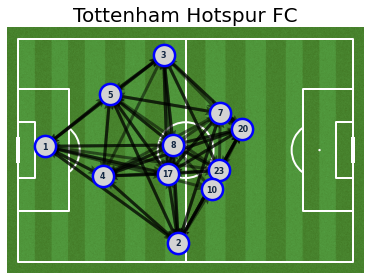

In [ ]:
#Y la red de pases junto al campo de la siguiente forma:

pitch = Pitch(pitch_color='grass', line_color='white',
              stripe=True)  # optional stripes
fig, ax = pitch.draw()
#Dibujamos las flechas
arrows = pitch.arrows(pass_between.x,pass_between.y,pass_between.x_end,pass_between.y_end,
                     width = 3, headwidth = 3, color = 'black', ax = ax, zorder = 1, alpha = .5)
#Dibujamos los vértices (Cada uno de los jugadores)
nodes = pitch.scatter(average_locations.x,average_locations.y,
                     s = 450, color = '#d3d3d3', edgecolors = 'blue', linewidth = 2.5, alpha = 1, zorder = 1, ax=ax)

#Dibujamos los números dentro de cada vértice:
for index, row in average_locations.iterrows():
     pitch.annotate(int(row.Dorsal), xy=(row.x,row.y), c='#132743', va='center', ha='center', size=8, fontweight='bold', fontfamily="Century Gothic",ax=ax)

ax.set_title('Tottenham Hotspur FC', size=20)

### Grafo del Tottenham

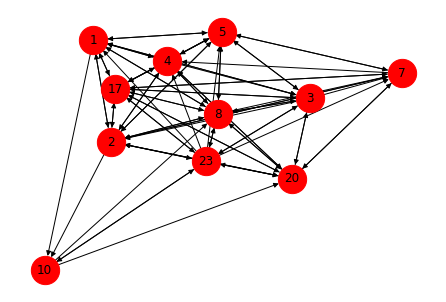

In [ ]:
#Utilizamos el dataset modificado pass_bet (Preparado para hacer la red de pases)
L = pass_bet.apply(tuple, axis=1).tolist()
G = nx.DiGraph()
G.add_weighted_edges_from(L)
nx.draw(G, node_size=800, with_labels=True, node_color='red')

In [ ]:
nx.write_gexf( G , "GrafoTottenham.gexf" )

In [ ]:
#Grados de los vértices
dict(nx.degree(G))

{1: 14,
 2: 18,
 3: 15,
 4: 15,
 5: 15,
 7: 12,
 8: 18,
 10: 6,
 17: 18,
 20: 15,
 23: 16}

In [ ]:
print(dict(G.in_degree()))
print(dict(G.out_degree()))

In [ ]:
#La cercanía mide de alguna forma la accesibilidad de un nodo en la red
DORSALES={1,2,3,4,5,7,8,10,17,20,23}
for x in DORSALES:
  print(x,':',nx.closeness_centrality(G,x))

1 : 0.7692307692307693
2 : 0.9090909090909091
3 : 0.7692307692307693
4 : 0.8333333333333334
5 : 0.8333333333333334
7 : 0.7692307692307693
8 : 0.9090909090909091
10 : 0.5882352941176471
17 : 0.9090909090909091
20 : 0.8333333333333334
23 : 0.7142857142857143


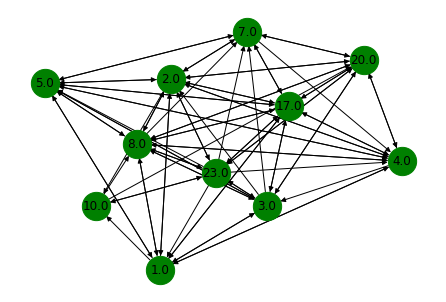

In [ ]:
def inv(x): 
    return 1/x

GR = pass_bet[:]
GR['pass_count'] = GR['pass_count'].apply(inv)

LR = GR.apply(tuple, axis=1).tolist()

G_inw = nx.DiGraph()
G_inw.add_weighted_edges_from(LR)
nx.draw(G_inw, node_size=800, with_labels=True, node_color='green')

In [ ]:
dis = nx.shortest_path(G_inw, weight='pass_count')
dis

{1.0: {1.0: [1.0],
  2.0: [1.0, 2.0],
  3.0: [1.0, 3.0],
  4.0: [1.0, 4.0],
  5.0: [1.0, 5.0],
  7.0: [1.0, 3.0, 7.0],
  8.0: [1.0, 8.0],
  10.0: [1.0, 10.0],
  17.0: [1.0, 17.0],
  20.0: [1.0, 3.0, 20.0],
  23.0: [1.0, 3.0, 23.0]},
 2.0: {1.0: [2.0, 1.0],
  2.0: [2.0],
  3.0: [2.0, 20.0, 3.0],
  4.0: [2.0, 4.0],
  5.0: [2.0, 5.0],
  7.0: [2.0, 7.0],
  8.0: [2.0, 8.0],
  10.0: [2.0, 10.0],
  17.0: [2.0, 17.0],
  20.0: [2.0, 20.0],
  23.0: [2.0, 23.0]},
 3.0: {1.0: [3.0, 1.0],
  2.0: [3.0, 2.0],
  3.0: [3.0],
  4.0: [3.0, 20.0, 4.0],
  5.0: [3.0, 5.0],
  7.0: [3.0, 7.0],
  8.0: [3.0, 8.0],
  10.0: [3.0, 23.0, 10.0],
  17.0: [3.0, 17.0],
  20.0: [3.0, 20.0],
  23.0: [3.0, 23.0]},
 4.0: {1.0: [4.0, 1.0],
  2.0: [4.0, 2.0],
  3.0: [4.0, 3.0],
  4.0: [4.0],
  5.0: [4.0, 5.0],
  7.0: [4.0, 20.0, 7.0],
  8.0: [4.0, 8.0],
  10.0: [4.0, 1.0, 10.0],
  17.0: [4.0, 17.0],
  20.0: [4.0, 20.0],
  23.0: [4.0, 20.0, 23.0]},
 5.0: {1.0: [5.0, 1.0],
  2.0: [5.0, 2.0],
  3.0: [5.0, 3.0],
  4.0: [5.0, 4.0

In [ ]:
#Camino más corto para ir de Lloris(Portero) a Son(Delantero)
dis[1][7]

[1.0, 3.0, 7.0]

In [ ]:
#Centralidad de intermediación (betweenness centrality)
BC = nx.betweenness_centrality(G, weight='pass_count')
BC

{1: 0.0251984126984127,
 2: 0.06742063492063492,
 3: 0.01843915343915344,
 4: 0.01650793650793651,
 5: 0.014828042328042327,
 7: 0.004828042328042328,
 8: 0.051044973544973546,
 10: 0.004074074074074075,
 17: 0.032896825396825397,
 20: 0.034272486772486774,
 23: 0.05271164021164021}

In [ ]:
max_bc = max(BC, key=BC.get)
max_bc

2